In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('compare-tools/all_results.csv')

In [3]:
df.head()

,Tool,Scenario,RPS,CPU (%),MEM (kB),Time (s)
0,wrk,scenario-1-120-400,155851.23,100.0,3693,0.0
1,wrk,scenario-1-120-400,155851.23,100.0,3772,5.0
2,wrk,scenario-1-120-400,155851.23,100.2,3789,10.0
3,wrk,scenario-1-120-400,155851.23,100.0,3796,16.0
4,wrk,scenario-1-120-400,155851.23,100.0,3796,21.0


In [4]:
df.tail()

,Tool,Scenario,RPS,CPU (%),MEM (kB),Time (s)
301,k6,scenario-60s-400,166280.345926,2680.0,1417160,47.0
302,k6,scenario-60s-400,166280.345926,2665.0,1723088,52.0
303,k6,scenario-60s-400,166280.345926,1532.0,1723088,57.0
304,k6,scenario-60s-400,166280.345926,100.6,2366336,62.0
305,k6,scenario-60s-400,166280.345926,0.0,0,68.0


In [13]:
# for a given tool, plot the average CPU and Memory against the RPS

df_agg = df.groupby(['Tool', 'Scenario']).agg({
    "CPU (%)": "mean",
    "MEM (kB)": "mean",
    "RPS": "max"
}).reset_index()

print(df_agg)

      Tool             Scenario      CPU (%)      MEM (kB)            RPS
0   go-wrk      scenario-60-200  3468.923077  4.382076e+05  102646.120000
1   go-wrk      scenario-60-400  3440.500000  8.911188e+05  123885.080000
2       k6     scenario-60s-200  2399.076923  1.046017e+06  166405.277963
3       k6     scenario-60s-400  2266.757143  1.002834e+06  166280.345926
4      wrk   scenario-1-120-200   101.669231  2.657923e+03  151071.500000
5      wrk   scenario-1-120-400    99.991667  3.832417e+03  155851.230000
6      wrk   scenario-1-120-600    99.950000  4.943458e+03  157924.380000
7      wrk    scenario-1-60-200    99.983333  2.693917e+03  154443.940000
8      wrk  scenario-10-120-200   455.458333  3.330625e+03  179178.230000
9      wrk  scenario-10-120-400   477.954167  4.619542e+03  179510.070000
10     wrk  scenario-10-120-600   481.037500  5.838708e+03  179027.820000
11     wrk   scenario-10-60-200   463.991667  3.317583e+03  179586.510000
12     wrk   scenario-5-120-200   286.

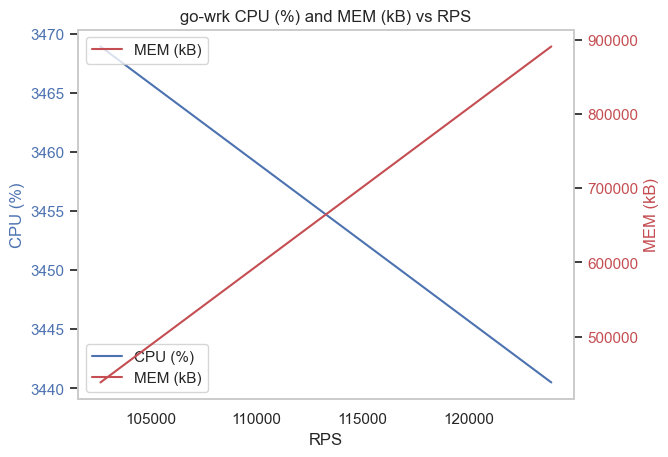

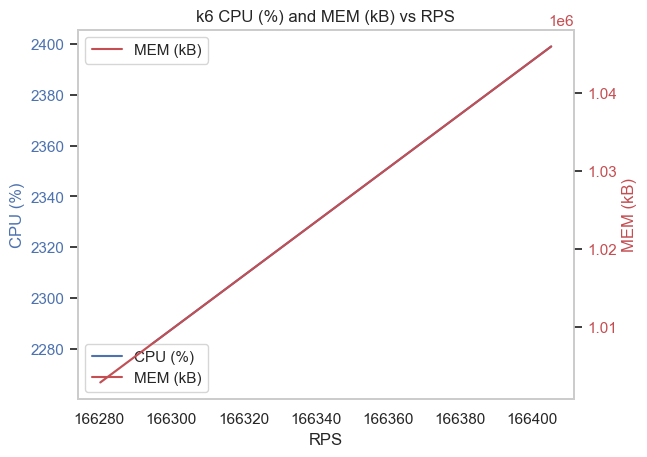

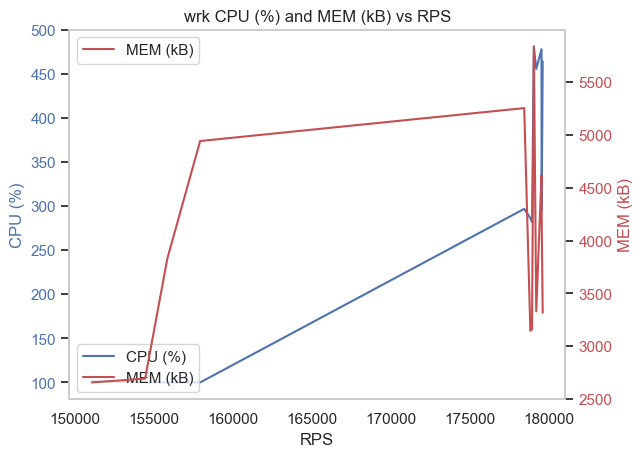

In [18]:
unique_tools = df_agg['Tool'].unique()

for tool in unique_tools:
    df_tool = df_agg[df_agg['Tool'] == tool]
    
    fig, ax1 = plt.subplots()

    sns.lineplot(data=df_tool, x='RPS', y='CPU (%)', ax=ax1, color='b', label='CPU (%)')
    ax1.set_xlabel('RPS')
    ax1.set_ylabel('CPU (%)', color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    ax1.grid(False)  # Disable grid for ax1

    ax2 = ax1.twinx()
    sns.lineplot(data=df_tool, x='RPS', y='MEM (kB)', ax=ax2, color='r', label='MEM (kB)')
    ax2.set_ylabel('MEM (kB)', color='r')
    ax2.tick_params(axis='y', labelcolor='r')
    ax2.grid(False)  # Disable grid for ax2

    plt.title(f'{tool} CPU (%) and MEM (kB) vs RPS')

    # Combine legends from both axes
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc='lower left')

    plt.show()